In [1]:
# importing libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import pickle

In [2]:
# reading the dataset
filepath = 'C:/Users/patel/OneDrive/Desktop/KDDM/Project/'
file= open(filepath+'training_data_2_csv_UTF.csv', mode='r', encoding='utf-8', errors='ignore')
df = pd.read_csv(file)

# 1 for bot account and 0 for non-bot account
bots = df[df.bot==1]
nonbots = df[df.bot==0]
df.head()

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,8.160000e+17,"""815745789754417152""","""HoustonPokeMap""","""Houston, TX""","""Rare and strong Pokmon in Houston, TX. See mo...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,False,"""Houston Pok Alert""",1
1,4.843621e+09,4843621225,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,False,Keri Nelson,1
2,4.303727e+09,4303727112,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,False,Matt Lieber Is Bot,1
3,3.063139e+09,3063139353,sc_papers,NaN,NaN,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,False,single cell papers,1
4,2.955142e+09,2955142070,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,False,lucarivera16,1


In [3]:
# dataset shape
print('Dataset Shape: ', df.shape)

Dataset Shape:  (2797, 20)


In [4]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2797 entries, 0 to 2796
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2797 non-null   float64
 1   id_str                 2797 non-null   object 
 2   screen_name            2797 non-null   object 
 3   location               1776 non-null   object 
 4   description            2394 non-null   object 
 5   url                    1455 non-null   object 
 6   followers_count        2797 non-null   int64  
 7   friends_count          2797 non-null   int64  
 8   listed_count           2797 non-null   int64  
 9   created_at             2797 non-null   object 
 10  favourites_count       2797 non-null   int64  
 11  verified               2797 non-null   bool   
 12  statuses_count         2797 non-null   int64  
 13  lang                   2797 non-null   object 
 14  status                 2508 non-null   object 
 15  defa

There are 10 character variables, 6 numerical variables including 1 float and 3 boolean type variable. 
The 'bot' is the target feature.
There are null values present in the dataset

In [5]:
# print statistical properties of the dataset
df.describe()

,id,followers_count,friends_count,listed_count,favourites_count,statuses_count,bot
count,2.797000e+03,2.797000e+03,2.797000e+03,2797.000000,2797.000000,2.797000e+03,2797.000000
mean,1.482460e+17,9.964245e+05,4.796493e+03,3192.299964,2035.577047,1.945170e+04,0.472292
std,3.100578e+17,5.593714e+06,5.619217e+04,17283.423291,16073.463967,1.543729e+05,0.499321
min,3.526000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,6.895649e+07,4.400000e+01,1.100000e+01,1.000000,0.000000,1.660000e+02,0.000000
50%,1.917035e+09,3.430000e+02,1.840000e+02,17.000000,25.000000,2.240000e+03,0.000000
75%,3.326332e+09,1.372500e+04,6.690000e+02,332.000000,491.000000,1.004200e+04,1.000000
max,8.410000e+17,9.632156e+07,2.056668e+06,620331.000000,714021.000000,6.863363e+06,1.000000


<AxesSubplot:>

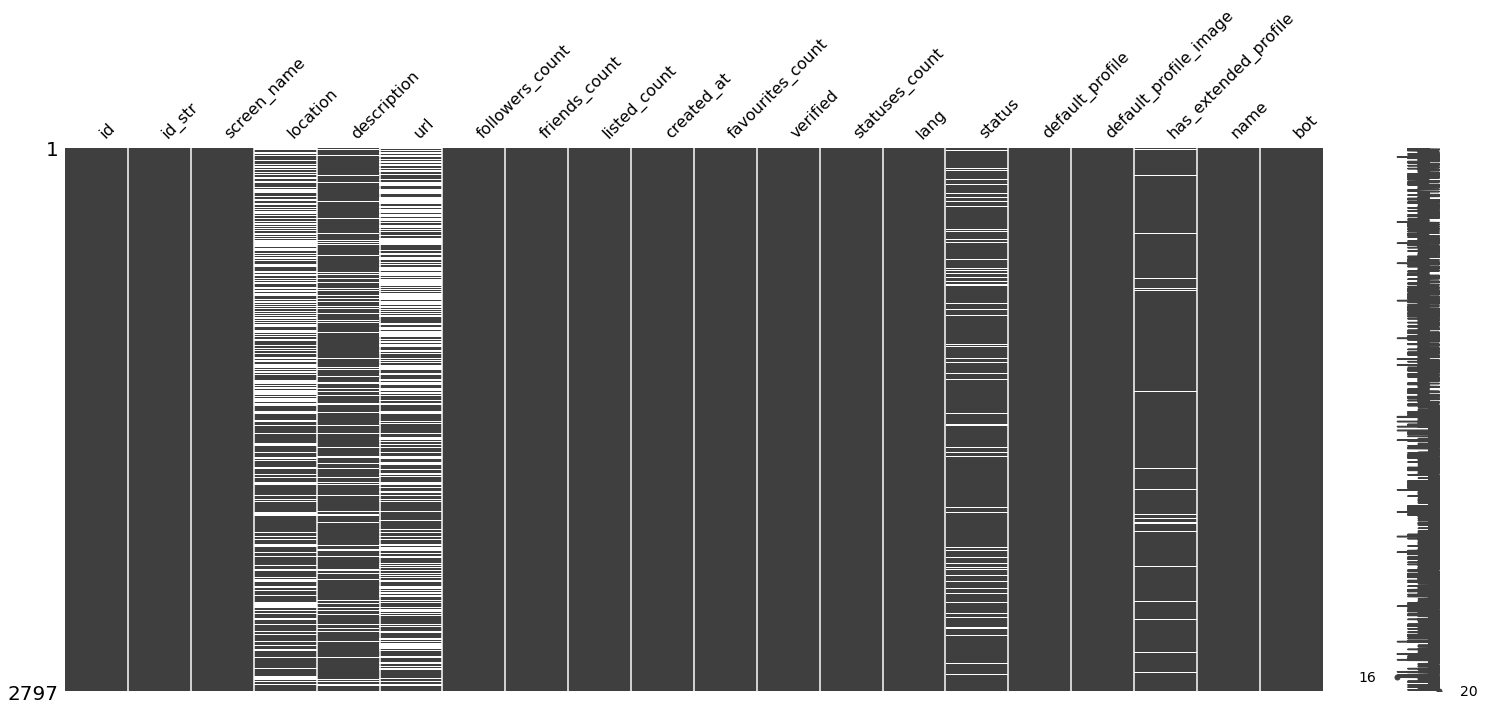

In [6]:
# finding null values
msno.matrix(df)
#df.isnull().sum()

We can see 5 feature columns out of the 20 feature columns contains null values.

In [7]:
# filling null values
df = df.fillna(0)
df.head()

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,8.160000e+17,"""815745789754417152""","""HoustonPokeMap""","""Houston, TX""","""Rare and strong Pokmon in Houston, TX. See mo...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,False,"""Houston Pok Alert""",1
1,4.843621e+09,4843621225,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,0,1,349,0,2/1/2016 7:37,38,False,31,en,0,True,False,False,Keri Nelson,1
2,4.303727e+09,4303727112,mattlieberisbot,0,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,False,Matt Lieber Is Bot,1
3,3.063139e+09,3063139353,sc_papers,0,0,0,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,False,single cell papers,1
4,2.955142e+09,2955142070,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,0,11,745,0,1/1/2015 17:44,146,False,185,en,0,False,False,False,lucarivera16,1


In [8]:
df.isnull().sum()

id                       0
id_str                   0
screen_name              0
location                 0
description              0
url                      0
followers_count          0
friends_count            0
listed_count             0
created_at               0
favourites_count         0
verified                 0
statuses_count           0
lang                     0
status                   0
default_profile          0
default_profile_image    0
has_extended_profile     0
name                     0
bot                      0
dtype: int64

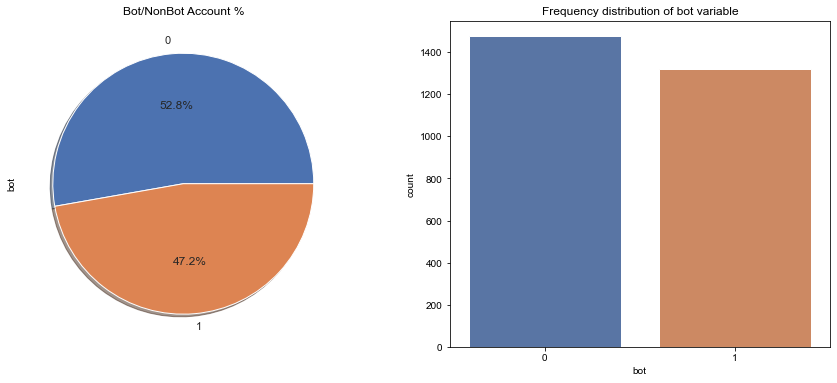

In [9]:
# count plot on bot/human accounts
f,ax=plt.subplots(1,2,figsize=(15,6))
sns.set_theme(style="darkgrid")
ax[0] = df['bot'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Bot/NonBot Account %')

ax[1] = sns.countplot(x="bot", data=df)
ax[1].set_title("Frequency distribution of bot variable")

plt.show()

In the above graph '1' represents bot accounts and '0' represents non-bot accounts and we can say that the dataset is balanced. 

In [11]:
df = df[["id","id_str","screen_name","location","description","url","followers_count","friends_count","listed_count","created_at","favourites_count","verified","statuses_count","lang","status","default_profile","default_profile_image","has_extended_profile","name","bot"]]

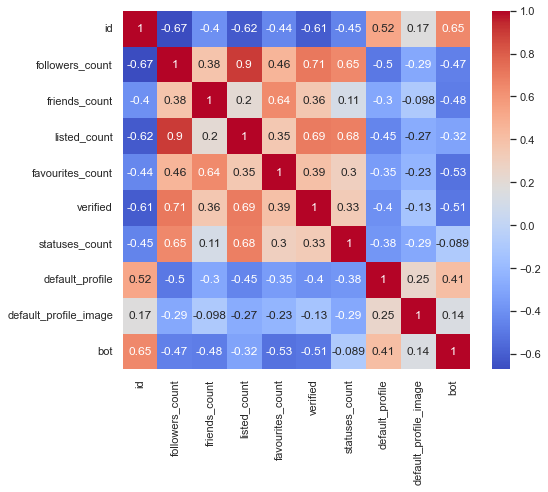

In [12]:
# finding the coorelation berween the target feature vs the rest of the features
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

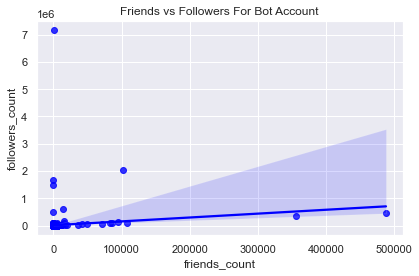

In [13]:
# friends vs followers count plot for bot accounts
bots.friends_count/bots.followers_count
plt.title('Friends vs Followers For Bot Account')
sns.regplot(bots.friends_count, bots.followers_count, color='blue', label='Bots')
plt.tight_layout()
plt.show()

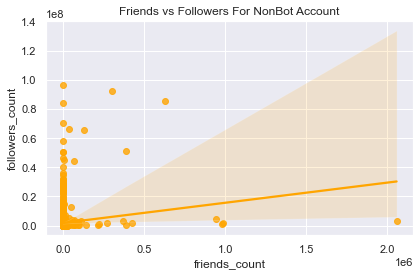

In [14]:
# friends vs followers count plot for non-bot accounts
plt.title('Friends vs Followers For NonBot Account')
sns.regplot(nonbots.friends_count, nonbots.followers_count, color='orange', label='NonBots')
plt.tight_layout()
plt.show()

In [15]:
bots['friends_by_followers'] = bots.friends_count/bots.followers_count
bots[bots.friends_by_followers<1].shape

nonbots['friends_by_followers'] = nonbots.friends_count/nonbots.followers_count
nonbots[nonbots.friends_by_followers<1].shape

(952, 21)

(504, 21)


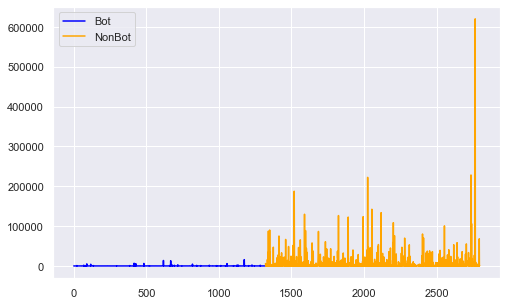

In [16]:
# plot listed count for bot vs NonBot accounts
plt.figure(figsize=(8,5))
plt.plot(bots.listed_count, color='blue', label='Bot')
plt.plot(nonbots.listed_count, color='orange', label='NonBot')
plt.legend(loc='upper left')
print(bots[(bots.listed_count<5)].shape)

In [17]:
bots_listed_count_df = bots[bots.listed_count<12000]
nonbots_listed_count_df = nonbots[nonbots.listed_count<12000]

bots_verified_df = bots_listed_count_df[bots_listed_count_df.verified==False]
bots_screenname_has_bot_df_ = bots_verified_df[(bots_verified_df.screen_name.str.contains("bot", case=False)==True)].shape

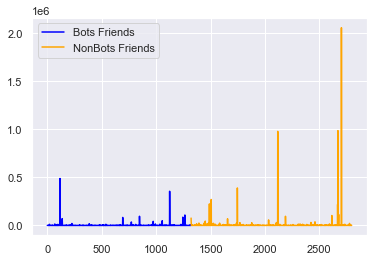

In [18]:
# plot Friends Count for Bot vs NonBot accounts
plt.plot(bots_listed_count_df.friends_count, color='blue', label='Bots Friends')
plt.plot(nonbots_listed_count_df.friends_count, color='orange', label='NonBots Friends')
plt.legend(loc='upper left')

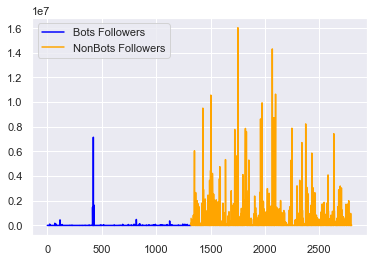

In [19]:
plt.plot(bots_listed_count_df.followers_count, color='blue', label='Bots Followers')
plt.plot(nonbots_listed_count_df.followers_count, color='orange', label='NonBots Followers')
plt.legend(loc='upper left')

In [20]:
# condition for bot accounts
case1 = (bots.screen_name.str.contains("bot", case=False)==True)|(bots.description.str.contains("bot", case=False)==True)|(bots.location.isnull())|(bots.verified==False)
bots['screen_name_binary'] = (bots.screen_name.str.contains("bot", case=False)==True)
bots['location_binary'] = (bots.location.isnull())
bots['verified_binary'] = (bots.verified==False)
bots.shape

(1321, 24)

In [21]:
# condition for nonbot accounts
case2 = (nonbots.screen_name.str.contains("bot", case=False)==False)| (nonbots.description.str.contains("bot", case=False)==False) |(nonbots.location.isnull()==False)|(nonbots.verified==True)
nonbots['screen_name_binary'] = (nonbots.screen_name.str.contains("bot", case=False)==False)
nonbots['location_binary'] = (nonbots.location.isnull()==False)
nonbots['verified_binary'] = (nonbots.verified==True)

nonbots.shape

(1476, 24)

In [22]:
# combining bo and nonbot accounts data
df = pd.concat([bots, nonbots])
df.shape

(2797, 24)

In [23]:
df.head()

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,...,status,default_profile,default_profile_image,has_extended_profile,name,bot,friends_by_followers,screen_name_binary,location_binary,verified_binary
0,8.160000e+17,"""815745789754417152""","""HoustonPokeMap""","""Houston, TX""","""Rare and strong Pokmon in Houston, TX. See mo...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",...,"{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,False,"""Houston Pok Alert""",1,0.000000,False,False,True
1,4.843621e+09,4843621225,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,2/1/2016 7:37,...,NaN,True,False,False,Keri Nelson,1,349.000000,False,False,True
2,4.303727e+09,4303727112,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,...,"{'retweeted': False, 'is_quote_status': False,...",True,False,False,Matt Lieber Is Bot,1,0.000000,True,True,True
3,3.063139e+09,3063139353,sc_papers,NaN,NaN,NaN,33,0,8,2/25/2015 20:11,...,Construction of human anti-tetanus single-chai...,True,True,False,single cell papers,1,0.000000,False,True,True
4,2.955142e+09,2955142070,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,11,745,0,1/1/2015 17:44,...,NaN,False,False,False,lucarivera16,1,67.727273,False,False,True


In [24]:
bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'
            
df['screen_name_binary'] = df.screen_name.str.contains(bag_of_words_bot, case=False, na=False)
df['name_binary'] = df.name.str.contains(bag_of_words_bot, case=False, na=False)
df['description_binary'] = df.description.str.contains(bag_of_words_bot, case=False, na=False)
df['status_binary'] = df.status.str.contains(bag_of_words_bot, case=False, na=False)
df['listed_count_binary'] = (df.listed_count>20000)==False
df['location_binary'] = (df.location.isnull())

In [25]:
df.drop(['id_str','screen_name','description','url','name','location','status','created_at'], axis=1, inplace=True)
df.drop(['lang'],axis=1, inplace=True)
df.drop(['listed_count'],axis=1, inplace=True)
df.drop(['default_profile_image'],axis=1, inplace=True)
df['has_extended_profile'] = (df.has_extended_profile.isnull())

In [26]:
df.head()

,id,followers_count,friends_count,favourites_count,verified,statuses_count,default_profile,has_extended_profile,bot,friends_by_followers,screen_name_binary,location_binary,verified_binary,name_binary,description_binary,status_binary,listed_count_binary
0,8.160000e+17,1291,0,0,False,78554,True,False,1,0.000000,True,False,True,False,False,True,True
1,4.843621e+09,1,349,38,False,31,True,False,1,349.000000,True,False,True,False,False,False,True
2,4.303727e+09,1086,0,0,False,713,True,False,1,0.000000,True,True,True,True,True,True,True
3,3.063139e+09,33,0,0,False,676,True,False,1,0.000000,True,True,True,True,False,False,True
4,2.955142e+09,11,745,146,False,185,False,False,1,67.727273,False,False,True,False,True,False,True


In [27]:
df.drop(['friends_by_followers'],axis=1, inplace=True)
df.drop(['has_extended_profile'],axis=1, inplace=True)
df.drop(['favourites_count'],axis=1, inplace=True)
df.drop(['verified_binary'],axis=1, inplace=True)

In [28]:
X = df.drop(['bot'],axis=1)
y = df['bot']

In [ ]:
#from sklearn.feature_selection import SelectKBest
#kbest = SelectKBest(k=10)
#X_new = kbest.fit_transform(X,y)

#print("----------------------------------------")
#print("Feature selection", kbest.get_support())
#print("----------------------------------------")
#print("Feature scores", kbest.scores_)
#print("----------------------------------------")
#print("Selected features:", list(X.columns[kbest.get_support()]))
#print("----------------------------------------")
#print("Removed features:", list(X.columns[~kbest.get_support()]))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [30]:
X_train.shape, X_test.shape

((1957, 12), (840, 12))

In [31]:
y_train.shape, y_test.shape

((1957,), (840,))

In [32]:
randomForestModel = RandomForestClassifier(criterion='entropy')
randomForestModel.fit(X_train, y_train)
y_pred_train = randomForestModel.predict(X_train)
y_pred_test = randomForestModel.predict(X_test)

In [33]:
print("Trainig Accuracy: %.4f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.4f" %accuracy_score(y_test, y_pred_test))

Trainig Accuracy: 0.9995
Test Accuracy: 0.9024


In [35]:
print('Precision: %.3f' % precision_score(y_test, y_pred_test))
print('Recall: %.3f' % recall_score(y_test, y_pred_test))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_test))

Precision: 0.895
Recall: 0.895
F1 Score: 0.895


<AxesSubplot:>

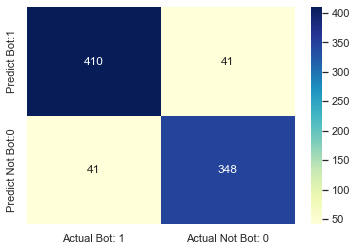

In [34]:
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Bot: 1', 'Actual Not Bot: 0'],index=['Predict Bot:1', 'Predict Not Bot:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [36]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       451
           1       0.89      0.89      0.89       389

    accuracy                           0.90       840
   macro avg       0.90      0.90      0.90       840
weighted avg       0.90      0.90      0.90       840



In [37]:
scaler = StandardScaler()
SVM_X_train = scaler.fit_transform(X_train)
SVM_X_test = scaler.transform(X_test)

In [38]:
SVCModel = SVC(probability=True) 
SVCModel.fit(SVM_X_train,y_train)

svc_y_pred_train = SVCModel.predict(SVM_X_train)
svc_y_pred_test = SVCModel.predict(SVM_X_test)

print("Trainig Accuracy: %.4f" %accuracy_score(y_train, svc_y_pred_train))
print("Test Accuracy: %.4f" %accuracy_score(y_test, svc_y_pred_test))

Trainig Accuracy: 0.8227
Test Accuracy: 0.8226


In [39]:
print('Precision: %.3f' % precision_score(y_test, svc_y_pred_test))
print('Recall: %.3f' % recall_score(y_test, svc_y_pred_test))
print('F1 Score: %.3f' % f1_score(y_test, svc_y_pred_test))

Precision: 0.861
Recall: 0.735
F1 Score: 0.793


<AxesSubplot:>

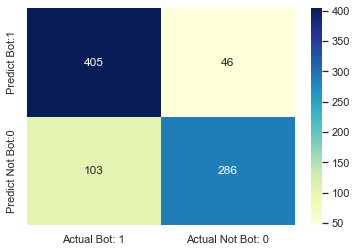

In [40]:
cm = confusion_matrix(y_test, svc_y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Bot: 1', 'Actual Not Bot: 0'],index=['Predict Bot:1', 'Predict Not Bot:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [41]:
print(classification_report(y_test, svc_y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       451
           1       0.86      0.74      0.79       389

    accuracy                           0.82       840
   macro avg       0.83      0.82      0.82       840
weighted avg       0.83      0.82      0.82       840



In [42]:
pred_prob1 = randomForestModel.predict_proba(X_test)
pred_prob2 = SVCModel.predict_proba(SVM_X_test)

In [43]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

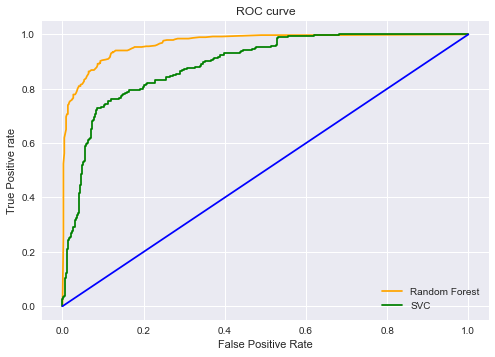

In [44]:
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='-',color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='-',color='green', label='SVC')
plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [45]:
pickle.dump(randomForestModel, open('predictionModel.pkl','wb'))